In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#open the csv
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/features.csv")
df= df.rename({'0': 'red_val', '1': 'green_val','2':'blue_val'}, axis=1) 
df

,red_val,green_val,blue_val,brightness,shutter_speed,exposure_time,iso,label
0,79.521870,109.512877,37.915592,4.85,8.976,0.001984,100.0,4
1,75.679507,105.365517,36.042771,4.92,9.066,0.001866,125.0,4
2,73.817239,103.502585,34.868638,4.93,9.109,0.001808,125.0,4
3,74.141495,102.659802,39.490112,5.03,9.193,0.001709,100.0,4
4,73.841558,102.396006,38.074632,5.04,9.193,0.001709,100.0,4
...,...,...,...,...,...,...,...,...
595,83.586370,106.100868,32.502262,5.04,9.024,0.001919,125.0,2
596,83.258601,94.892797,25.081329,5.51,9.574,0.001311,100.0,2
597,89.934311,102.587774,27.332004,5.35,9.323,0.001560,125.0,2
598,56.277831,75.547299,10.651658,5.29,9.367,0.001515,125.0,2


In [ ]:
X=df.drop('label',1)
y=df['label']

# 1.
Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 7 of the best features 

In [ ]:
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 7 best features
bestfeatures = SelectKBest(score_func=f_classif, k=7)
#bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 7 best features

           Specs       Score
2       blue_val  102.187974
0        red_val   45.802413
1      green_val   19.583238
4  shutter_speed    8.183515
5  exposure_time    7.263456
3     brightness    5.834040
6            iso    4.792775


#2.
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 7 features for the dataset.

[0.24126267 0.14155176 0.24757234 0.15056221 0.09959496 0.10089186
 0.0185642 ]


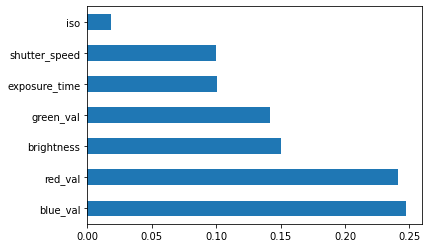

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()